In [1]:
from regraph import Rule, plot_rule, plot_graph, plot_instance, find_matching
from regraph.primitives import *

import networkx as nx

In [2]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["gene1", "gene2", "residue"])
add_edges_from(pattern, [("residue", "gene1"), ("residue", "gene2")])

In [3]:
rule = Rule.from_transform(pattern)
rule.inject_merge_nodes(["gene1", "gene2"])
rule.inject_add_node("new_node")
rule.inject_add_edge("residue", "new_node")
rule.inject_clone_node("residue")

('residue1', 'residue1')

/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.

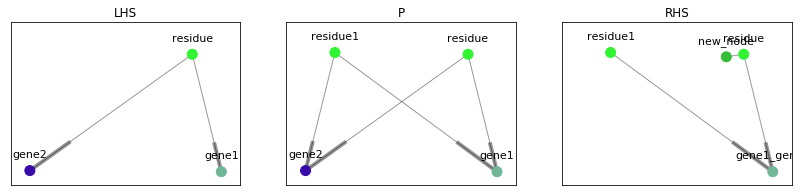

In [4]:
plot_rule(rule)

In [5]:
print(rule.to_commands())

CLONE residue AS residue1.
MERGE [gene1, gene2] AS 'gene1_gene2'.
ADD_NODE new_node {}.
ADD_EDGE residue new_node {}.



In [6]:
g = nx.DiGraph()
add_nodes_from(g, [1, 2, 3, 4, 5, 6])
add_edges_from(g, [(2, 1), (2, 3), (3, 4), (3, 5)])

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

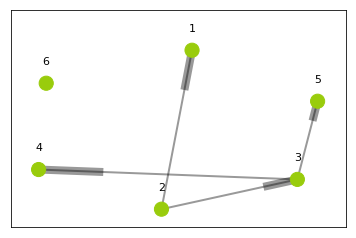

In [7]:
pos = plot_graph(g)

In [8]:
instances = find_matching(g, rule.lhs)

In [9]:
instances

[{'gene1': 1, 'gene2': 3, 'residue': 2},
 {'gene1': 3, 'gene2': 1, 'residue': 2},
 {'gene1': 4, 'gene2': 5, 'residue': 3},
 {'gene1': 5, 'gene2': 4, 'residue': 3}]

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:526: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/home/eugenia/anaconda3/lib/python3.6/site-packages/n

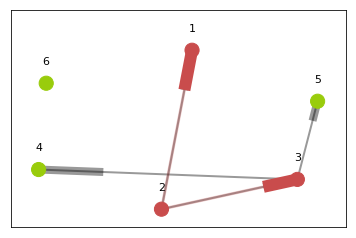

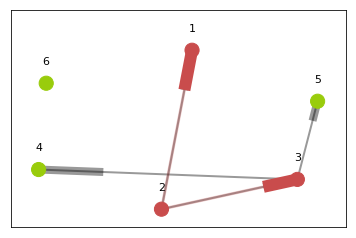

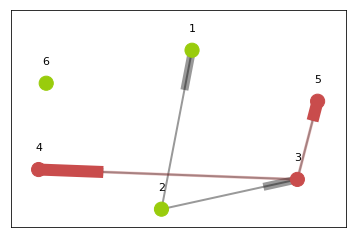

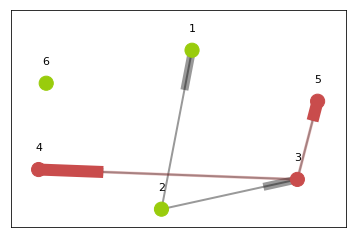

In [10]:
for instance in instances:
    plot_instance(g, rule.lhs, instance, parent_pos=pos)

In [11]:
rule.apply_to(g, instances[0], inplace=True)

(<networkx.classes.digraph.DiGraph at 0x7f51fc254ac8>,
 {'gene1_gene2': '1_3',
  'new_node': 'new_node',
  'residue': 2,
  'residue1': '21'})

In [12]:
parent_pos={k: v for k, v in pos.values() if k in g.nodes()}

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

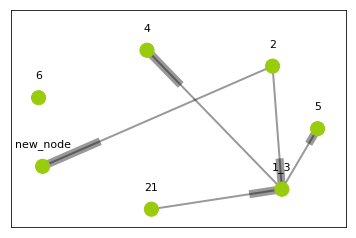

{2: array([0.78927314, 0.89992581]),
 4: array([0.36574369, 1.        ]),
 5: array([0.94122127, 0.506369  ]),
 6: array([0.        , 0.70131953]),
 '21': array([0.38045742, 0.        ]),
 '1_3': array([0.82078743, 0.12545058]),
 'new_node': array([0.01357758, 0.26962837])}

In [13]:
plot_graph(g, parent_pos={k: v for k, v in pos.values() if k in g.nodes()})

In [14]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["x", "circle", "square", "dot"])
add_edges_from(pattern, [("x", "dot"), ("circle", "dot"), ("square", "dot")])

In [15]:
rule = Rule.from_transform(pattern)

rule.inject_remove_node("x")
p_new_name, _ = rule.inject_clone_node("circle")
rule.inject_remove_edge(p_new_name, "dot"),
merge_name = rule.inject_merge_nodes([p_new_name, "square"])
rule.inject_add_node("y")
rule.inject_add_edge(merge_name, "y")

/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.

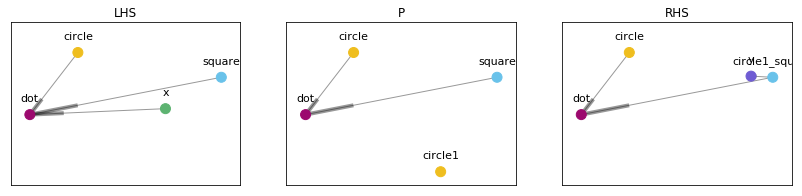

In [16]:
plot_rule(rule)

In [17]:
print(rule.to_commands())

CLONE circle AS circle1.
DELETE_NODE x.
DELETE_EDGE circle1 dot.
MERGE [circle1, square] AS 'circle1_square'.
ADD_NODE y {}.
ADD_EDGE circle1_square y {}.



## Refine rule

In [ ]:
graph = nx.DiGra